In [10]:
import pandas as pd # Data handling
import numpy as np # Numerical operations
import matplotlib.pyplot as plt # Data visualization
from sklearn.model_selection import train_test_split # Train-test split
from sklearn.preprocessing import StandardScaler # Feature scaling
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,precision_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import recall_score


In [11]:
df=pd.read_csv("Downloads/Social_Network_Ads.csv")
df.head()


,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [12]:
label_encoder = LabelEncoder()
df["Gender"] = label_encoder.fit_transform(df["Gender"])
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0


In [13]:
df.isnull().sum()


User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [14]:
 df.cov()

,User ID,Gender,Age,EstimatedSalary,Purchased
User ID,5.134915e+09,-905.617719,-541.682870,1.737143e+08,244.836284
Gender,-9.056177e+02,0.250526,-0.386917,-1.031404e+03,-0.010201
Age,-5.416829e+02,-0.386917,109.890702,5.548738e+04,3.131165
EstimatedSalary,1.737143e+08,-1031.403509,55487.380952,1.162603e+09,5924.367168
Purchased,2.448363e+02,-0.010201,3.131165,5.924367e+03,0.230269


In [15]:
X = df.drop(columns=["Purchased"]) # Assuming "Purchased" is the targetvari
Y = df["Purchased"]
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.2,
random_state=42)
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()
features_scaled = scaler.fit_transform(df)
df_normalized = pd.DataFrame(features_scaled, columns = df.columns)
df_normalized


,User ID,Gender,Age,EstimatedSalary,Purchased
0,0.232636,1.0,0.023810,0.029630,0.0
1,0.982732,1.0,0.404762,0.037037,0.0
2,0.409926,0.0,0.190476,0.207407,0.0
3,0.147083,0.0,0.214286,0.311111,0.0
4,0.954801,1.0,0.023810,0.451852,0.0
...,...,...,...,...,...
395,0.503623,0.0,0.666667,0.192593,1.0
396,0.560787,1.0,0.785714,0.059259,1.0
397,0.352477,0.0,0.761905,0.037037,1.0
398,0.757720,1.0,0.428571,0.133333,0.0


In [16]:
logreg = LogisticRegression()
logreg.fit(xtrain, ytrain)

LogisticRegression()

In [17]:
y_pred_train = logreg.predict(xtrain)
y_pred_test = logreg.predict(xtest)
train_acc = accuracy_score(ytrain, y_pred_train)
test_acc = accuracy_score(ytest, y_pred_test)
cm = confusion_matrix(ytest, y_pred_test)
precision = precision_score(ytest, y_pred_test)
recall = recall_score(ytest, y_pred_test)
print("Training Accuracy:", train_acc)
print("Testing Accuracy:", test_acc)
print("Confusion Matrix:\n", cm)
print("Precision:", precision)
print("Recall:", recall)

Training Accuracy: 0.840625
Testing Accuracy: 0.8875
Confusion Matrix:
 [[50  2]
 [ 7 21]]
Precision: 0.9130434782608695
Recall: 0.75


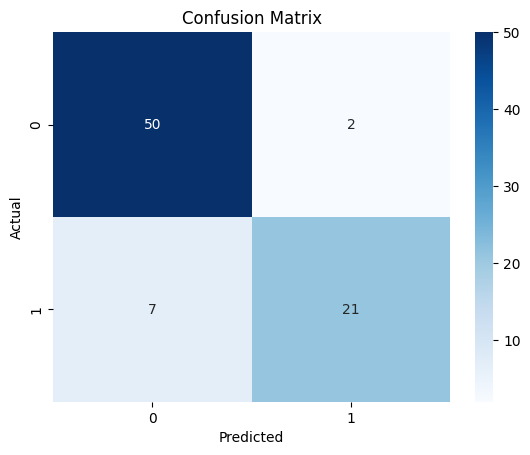

In [19]:
import seaborn as sns
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
